In [1]:
from random import choices
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix 
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
classf = pd.read_csv("dataFinal.csv")
classf

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,idRestaurant,date,Type,Plat,meteo,Event,idEtudiant,Heberg,Rev_par,Bourse,presenceP,presence
0,0,0,0,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0001,interne,56879,Oui,0.525,1
1,1,1,1,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0002,externe,19184,Oui,0.705,1
2,2,2,2,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0003,externe,56879,Oui,0.600,1
3,3,3,3,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0004,externe,19184,Oui,0.705,1
4,4,4,4,Esi016,01-09-2019,midi,Lentilles,Ensoleillé,Normal,17/0005,interne,139936,Non,0.410,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215995,215995,215995,215995,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0196,interne,25251,Oui,0.650,1
215996,215996,215996,215996,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0197,interne,19184,Oui,0.650,1
215997,215997,215997,215997,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0198,interne,56879,Oui,0.545,0
215998,215998,215998,215998,Esi016,15-08-2022,midi,Loubia,Ensoleillé,Normal,17/0199,interne,56879,Oui,0.545,0


In [3]:
ListDate = classf['date']

In [4]:
classf = classf.drop([ "Unnamed: 0","idRestaurant", "date", "Type" , "idEtudiant", "presenceP","Unnamed: 0.1","Unnamed: 0.1.1"],axis=1)

In [5]:
classf

,Plat,meteo,Event,Heberg,Rev_par,Bourse,presence
0,Lentilles,Ensoleillé,Normal,interne,56879,Oui,1
1,Lentilles,Ensoleillé,Normal,externe,19184,Oui,1
2,Lentilles,Ensoleillé,Normal,externe,56879,Oui,1
3,Lentilles,Ensoleillé,Normal,externe,19184,Oui,1
4,Lentilles,Ensoleillé,Normal,interne,139936,Non,0
...,...,...,...,...,...,...,...
215995,Loubia,Ensoleillé,Normal,interne,25251,Oui,1
215996,Loubia,Ensoleillé,Normal,interne,19184,Oui,1
215997,Loubia,Ensoleillé,Normal,interne,56879,Oui,0
215998,Loubia,Ensoleillé,Normal,interne,56879,Oui,0


In [6]:
classf["Plat"].replace(["Lentilles","Loubia","Riz","Spaghetti","Couscous","Weekend"],[0,1,2,3,4,5],inplace=True)
classf["meteo"].replace(["Ensoleillé","Nuageux","Mauvais"],[0,1,2],inplace=True)
classf["Event"].replace(["Normal","Weekend", "Jour férié","Ramadan"],[0,1,2,3],inplace=True)
classf["Heberg"].replace(["interne","externe"],[0,1],inplace=True)
classf["Bourse"].replace(["Oui","Non"],[0,1],inplace=True)

In [7]:
trainC = classf[:14400]
testC = classf[144001:]

In [8]:
Ytrain = trainC["presence"]
Xtrain = trainC.drop(["presence"], axis=1)
Ytest = testC["presence"]
Xtest = testC.drop(["presence"], axis=1)

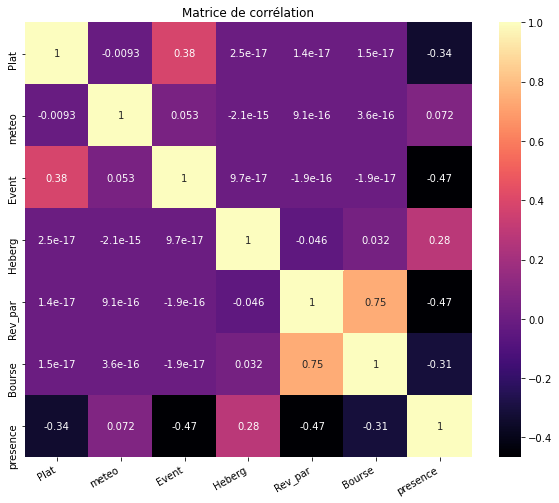

In [10]:
fig, axes = plt.subplots(figsize= (10,8))
sns.heatmap(trainC.corr(), annot=True, cmap='magma')
plt.xticks(rotation=30, ha='right')
plt.title("Matrice de corrélation")
plt.show()

In [11]:
modele_rf = RandomForestClassifier(
     n_estimators=100,
     criterion='gini',
     max_depth=None,
     min_samples_split=2,
     min_samples_leaf=1,
     min_weight_fraction_leaf=0.0,
     max_features='auto',
     max_leaf_nodes=None,
     min_impurity_decrease=0.0,
     bootstrap=True,
     oob_score=False,
     n_jobs=None,
     random_state=None,
     verbose=0,
     warm_start=False,
     class_weight=None,
     ccp_alpha=0.0,
     max_samples=None,)

In [12]:
modele_rf.fit(Xtrain, Ytrain)

RandomForestClassifier()

In [13]:
pd.DataFrame(modele_rf.feature_importances_,
              index = Xtrain.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)

,importance
Rev_par,0.312835
Plat,0.271859
Event,0.205609
Heberg,0.119274
Bourse,0.048293
meteo,0.042130


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f"Le pourcentage de bien classés est de : {accuracy_score(Ytest, modele_rf.predict(Xtest))*100} %")

Le pourcentage de bien classés est de : 97.44579785830358 %


In [15]:
pd.DataFrame(confusion_matrix(Ytest, modele_rf.predict(Xtest)),
             index = ["blanc_données", "rouge_données"],
             columns = ["blanc_predit", "rouge_predit"])

,blanc_predit,rouge_predit
blanc_données,32438,10
rouge_données,1829,37722


In [16]:
prevision = {
  "Date": ListDate[144001:],
  "Test": Ytest,
  "Prevision": modele_rf.predict(Xtest),
}
Prev = pd.DataFrame(prevision)

In [18]:
Prev

,Date,Test,Prevision
144001,21-08-2021,1,1
144002,21-08-2021,0,0
144003,21-08-2021,1,1
144004,21-08-2021,0,0
144005,21-08-2021,1,1
...,...,...,...
215995,15-08-2022,1,1
215996,15-08-2022,1,1
215997,15-08-2022,0,0
215998,15-08-2022,0,0


In [19]:
gb = Prev.groupby('Date').sum()

In [20]:
gb

,Test,Prevision
Date,,
01-01-2022,7,0
01-02-2022,156,153
01-03-2022,156,153
01-04-2022,7,0
01-05-2022,7,0
...,...,...
31-05-2022,108,105
31-07-2022,156,153
31-08-2021,108,105
